<a href="https://colab.research.google.com/github/Prasanna717/Projects/blob/main/Copy_of_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing steps

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Unnamed: 6,Unnamed: 7
0,1,5.1,3.5,1.4,0.2,Iris-setosa,NaN,NaN
1,2,4.9,3.0,1.4,0.2,Iris-setosa,NaN,NaN
2,3,4.7,3.2,1.3,0.2,Iris-setosa,NaN,NaN
3,4,4.6,3.1,1.5,0.2,Iris-setosa,NaN,NaN
4,5,5.0,3.6,1.4,0.2,Iris-setosa,NaN,NaN
5,6,5.4,3.9,1.7,0.4,Iris-setosa,NaN,NaN
6,7,4.6,3.4,1.4,0.3,Iris-setosa,NaN,NaN
7,8,5.0,3.4,1.5,0.2,Iris-setosa,NaN,NaN
8,9,4.4,2.9,1.4,0.2,Iris-setosa,NaN,NaN
9,10,4.9,3.1,1.5,0.1,Iris-setosa,NaN,NaN


In [5]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Unnamed: 6,Unnamed: 7
145,146,6.7,3.0,5.2,2.3,Iris-virginica,NaN,NaN
146,147,6.3,2.5,5.0,1.9,Iris-virginica,NaN,NaN
147,148,6.5,3.0,5.2,2.0,Iris-virginica,NaN,NaN
148,149,6.2,3.4,5.4,2.3,Iris-virginica,NaN,NaN
149,150,5.9,3.0,5.1,1.8,Iris-virginica,NaN,NaN


In [6]:
data.shape

(150, 8)

In [7]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.50,43.45,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.84,0.83,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.05,0.43,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.76,1.76,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.20,0.76,0.1,0.30,1.30,1.80,2.5
Unnamed: 6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

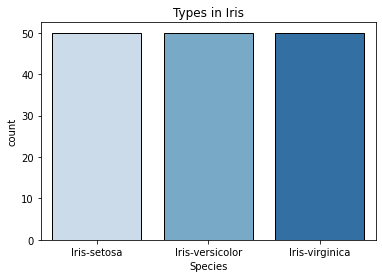

In [11]:
plt.title('Types in Iris')
sns.countplot(x="Species", data=data, palette = 'Blues', edgecolor='Black')

**Distribution**

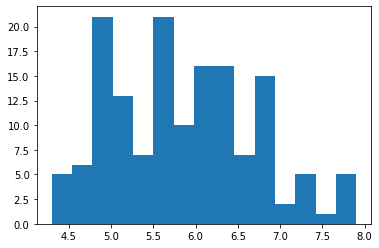

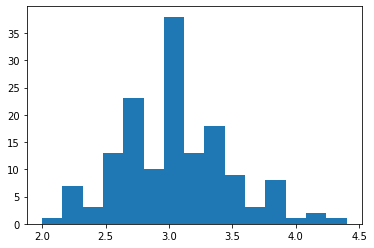

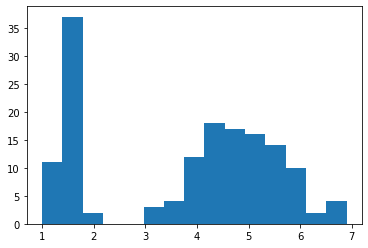

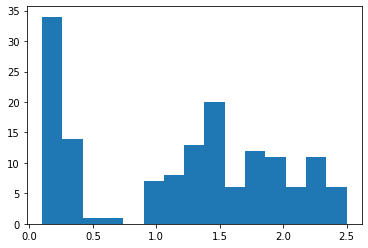

In [14]:
sepal_length = data['SepalLengthCm']
plt.hist(sepal_length , bins=15)
plt.show()
sepal_width = data['SepalWidthCm']
plt.hist(sepal_width , bins=15)
plt.show()
petal_length = data['PetalLengthCm']
plt.hist(petal_length , bins=15)
plt.show()
petal_width = data['PetalWidthCm']
plt.hist(petal_width , bins=15)
plt.show()


**Modelling and prediction**

In [15]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 5].values

In [16]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y[:5,]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

Missing Data detection and substituting it with required strategic number

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:5])
X[:, 1:5] = imputer.transform(X[:, 1:5])

Encoding dependent variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Splitting the data (test and train sets)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 4)

In [ ]:
X_train

array([[4.9, 3.1, 1.5, 0.1],
       [5. , 2. , 3.5, 1. ],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3. , 4.5, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [6.7, 3.3, 5.7, 2.5],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.6, 4. , 1.2],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5. , 3.4, 1.5, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3

In [ ]:
y_train

array([0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2,
       1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2])

In [ ]:
X_test

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ]])

In [ ]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2])

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [ ]:
X_train

array([[-1.12677738,  0.11700926, -1.29793486, -1.45549183],
       [-1.00479266, -2.4382665 , -0.14174082, -0.26863104],
       [-1.37074682,  0.34930706, -1.41355426, -1.32361841],
       [-1.2487621 ,  0.81390265, -1.06669605, -1.32361841],
       [ 0.5810087 , -0.81218193,  0.667595  ,  0.78635632],
       [-1.00479266,  0.34930706, -1.47136396, -1.32361841],
       [ 1.06894759,  0.58160485,  1.13007261,  1.18197658],
       [ 0.45902398, -1.97367091,  0.43635619,  0.39073606],
       [-1.00479266,  0.81390265, -1.24012516, -1.05987157],
       [-1.37074682,  0.34930706, -1.24012516, -1.32361841],
       [-0.88280794,  1.74309384, -1.29793486, -1.19174499],
       [-1.61471626, -1.74137311, -1.41355426, -1.19174499],
       [-0.51685378,  1.97539163, -1.41355426, -1.05987157],
       [-0.51685378,  0.81390265, -1.18231546, -1.32361841],
       [-0.0289149 , -0.81218193,  0.7832144 ,  0.91822974],
       [-0.51685378, -0.11528854,  0.43635619,  0.39073606],
       [-1.49273154,  0.

In [ ]:
X_test

array([[ 0.70299343, -0.57988413,  1.07226291,  1.18197658],
       [-0.15089962,  1.74309384, -1.18231546, -1.19174499],
       [ 1.92284063, -0.57988413,  1.36131142,  0.91822974],
       [ 2.16681007, -0.11528854,  1.65035993,  1.18197658],
       [ 1.80085591, -0.34758633,  1.47693082,  0.78635632],
       [ 0.21505454, -0.34758633,  0.43635619,  0.39073606],
       [ 0.21505454, -0.81218193,  0.7832144 ,  0.52260948],
       [-0.0289149 ,  2.20768943, -1.47136396, -1.32361841],
       [-0.51685378,  1.97539163, -1.18231546, -1.05987157],
       [ 0.5810087 , -0.57988413,  0.7832144 ,  0.39073606],
       [-1.00479266, -0.11528854, -1.24012516, -1.32361841],
       [-1.2487621 ,  0.81390265, -1.24012516, -1.32361841],
       [-1.2487621 , -0.11528854, -1.35574456, -1.45549183],
       [ 0.33703926, -0.34758633,  0.5519756 ,  0.25886264],
       [-0.15089962, -1.27677752,  0.7254047 ,  1.05010316]])

***Training the Model (Decision tree)***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print(classifier.predict(sc.transform([[6.5,5.5,3.6,2.5]])))

[2]


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6 0 0]
 [0 2 1]
 [0 0 6]]


0.9333333333333333

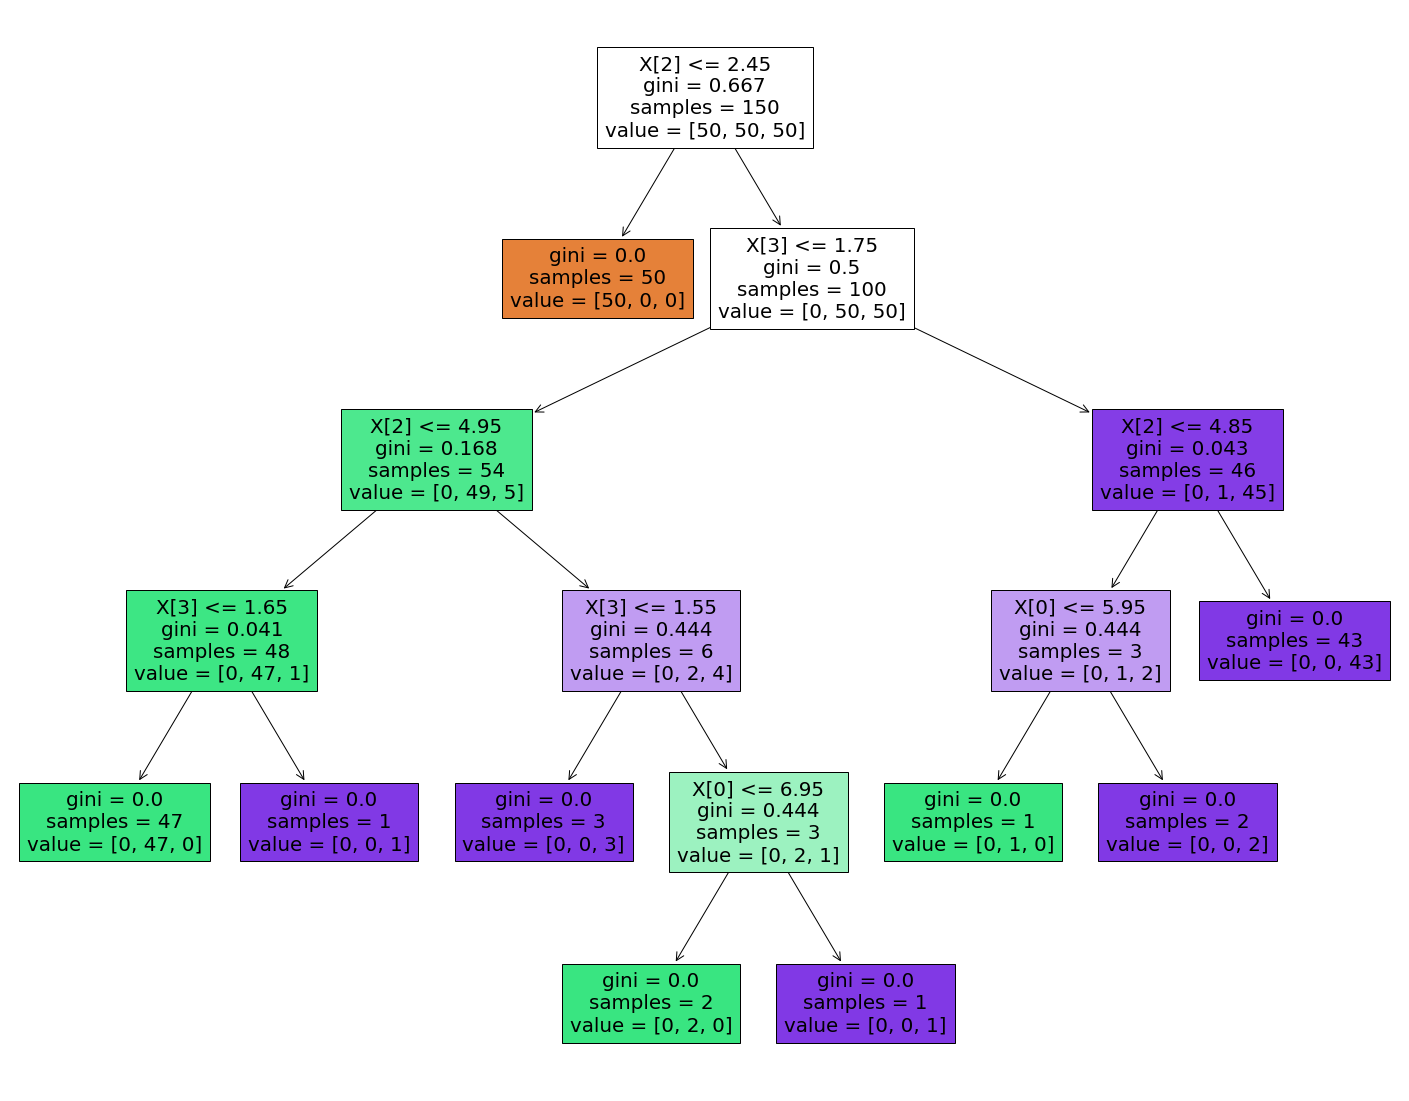

In [ ]:
plt.figure(figsize=(25,20))
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.show()

In [ ]:
from sklearn.tree import export_text

In [ ]:
from sklearn import tree

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

